# 使用するライブラリやツール
- Python 3.7
- NumPy
- Pandas
- Scikit-learn

**必須ではないもの**
- MatPlotLib

# 事前準備

## ライブラリのインポート

In [1]:
import pandas as pd
import os
import numpy as np

## 評価関数の作成

In [2]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pre):
    return np.sqrt(mean_squared_error(y_true, y_pre))

from sklearn.metrics import make_scorer
rmse_scorer = make_scorer(rmse)

## 目的変数の名前取得

In [3]:
target_col = "y"

## データの読み込み

In [4]:
# データの読み込み
train = pd.read_csv("./train.csv",)
train_add = pd.read_csv("./train_add.csv", )
test = pd.read_csv("./test.csv", )
condition = pd.read_csv("./condition.csv", )
condition_add = pd.read_csv("./condition_add.csv", )
stadium = pd.read_csv("./stadium.csv", index_col=0)
data_2014 = pd.read_csv("./2014_add.csv")

## 追加データの結合

In [5]:
train_addition = pd.concat([train, train_add], sort=False)
condition_addition = pd.concat([condition, condition_add])
test = pd.concat([test, data_2014])

train_ = pd.merge(left=train_addition, right=condition_addition, how="inner", on="id")
test_ = pd.merge(test, condition_addition, how="inner", on="id")

## インデックスをIDに設定

In [6]:
train_ = train_.set_index("id")
test_ = test_.set_index("id")

In [7]:
# 各列の情報を確認(NaNがあるかとデータの型)
train_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 13994 to 16238
Data columns (total 40 columns):
y              1953 non-null int64
year           1953 non-null int64
stage          1953 non-null object
match          1953 non-null object
gameday        1953 non-null object
time           1953 non-null object
home           1953 non-null object
away           1953 non-null object
stadium        1953 non-null object
tv             1953 non-null object
home_score     1953 non-null int64
away_score     1953 non-null int64
weather        1953 non-null object
temperature    1953 non-null float64
humidity       1953 non-null object
referee        1953 non-null object
home_team      1953 non-null object
home_01        1953 non-null object
home_02        1953 non-null object
home_03        1953 non-null object
home_04        1953 non-null object
home_05        1953 non-null object
home_06        1953 non-null object
home_07        1953 non-null object
home_08        1953 non-nul

# データの加工

## 全角から半角へ
全角が何となく気持ち悪かったので半角へ

In [8]:
up_to_down = {"Ｊ１": "J1", "Ｊ２": "J2"}
train_["stage"] = train_["stage"].replace(up_to_down)
test_["stage"] = test_["stage"].replace(up_to_down)

In [9]:
print(train_["stage"].value_counts())
print(test_["stage"].value_counts())

J2    1188
J1     765
Name: stage, dtype: int64
J2    198
J1    153
Name: stage, dtype: int64


## ダミー変数化
学習、テストデータにはJ1とJ2のみしかないことを確認したので列数の不整合は起きない

In [10]:
dummies = pd.get_dummies(train_["stage"], prefix="stage", drop_first=True)
train_ = train_.drop("stage", axis=1).join(dummies)

dummies = pd.get_dummies(test_["stage"], prefix="stage", drop_first=True)
test_ = test_.drop("stage", axis=1).join(dummies)

In [11]:
train_.head()

,y,year,match,gameday,time,home,away,stadium,tv,home_score,...,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,stage_J2
id,,,,,,,,,,,,,,,,,,,,,
13994,18250,2012,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,1,...,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,0
13995,24316,2012,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,1,...,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀,0
13996,17066,2012,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,2,...,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人,0
13997,29603,2012,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,1,...,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也,0
13998,25353,2012,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,0,...,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,0


## 使えそうにないデータを削除
チーム名はhomeとhome_teamのように結合時に重複したので削除

In [12]:
drop_list = ["referee", "away_team", "home_team"]
for i in range(1, 12):
    str_i = str(i).zfill(2)
    away_cols = "away_" + str_i
    home_cols = "home_" + str_i
    drop_list.append(away_cols)
    drop_list.append(home_cols)

In [13]:
train_ = train_.drop(drop_list, axis=1)
test_ = test_.drop(drop_list, axis=1)

In [14]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 13994 to 16238
Data columns (total 15 columns):
y              1953 non-null int64
year           1953 non-null int64
match          1953 non-null object
gameday        1953 non-null object
time           1953 non-null object
home           1953 non-null object
away           1953 non-null object
stadium        1953 non-null object
tv             1953 non-null object
home_score     1953 non-null int64
away_score     1953 non-null int64
weather        1953 non-null object
temperature    1953 non-null float64
humidity       1953 non-null object
stage_J2       1953 non-null uint8
dtypes: float64(1), int64(4), object(9), uint8(1)
memory usage: 310.8+ KB


## ダミー変数化2
学習データとテストデータの両方に同じ値が含まれないとダミー変数化時に列数に差が生まれる

その為、値が含まれない場合にはFalse(0)のみの列も作成できるようにしている

In [15]:
for condition in ["晴", "曇", "雨", "屋内", "雷", "雪", "霧", "のち", "時々", "一時"]:
    train_["weather_{}".format(condition)] = train_["weather"].str.contains(condition)
    test_["weather_{}".format(condition)] = test_["weather"].str.contains(condition)

In [16]:
# 曜日もダミー変数化(テストデータには木曜が含まれていなかったので、pd.get_dummiesでは後にエラーとなる)
for yobi in ["月", "火", "水", "木", "金", "土", "日"]:
    train_["yobi_{}".format(yobi)] = train_["gameday"].str.contains(yobi)
    test_["yobi_{}".format(yobi)] = test_["gameday"].str.contains(yobi)

## データ全体からチーム名の取得
今回のプログラムでは特に使用していない

In [17]:
df_merge = pd.concat([train_.drop(target_col, axis=1), test_])
team_name = set(df_merge["home"].unique() + df_merge["away"].unique())

In [18]:
train_.head()

,y,year,match,gameday,time,home,away,stadium,tv,home_score,...,weather_のち,weather_時々,weather_一時,yobi_月,yobi_火,yobi_水,yobi_木,yobi_金,yobi_土,yobi_日
id,,,,,,,,,,,,,,,,,,,,,
13994,18250,2012,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,1,...,False,False,False,False,False,False,False,False,True,False
13995,24316,2012,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,1,...,False,False,False,False,False,False,False,False,True,False
13996,17066,2012,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,2,...,False,False,True,False,False,False,False,False,True,False
13997,29603,2012,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,1,...,True,False,True,False,False,False,False,False,True,False
13998,25353,2012,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,0,...,False,False,False,False,False,False,False,False,True,False


## 正規表現で試合開始時間の時刻を取り出す

In [19]:
import re
raw_time = r"[0-9]{2}"
re_time = re.compile(raw_time)
train_["time"] = train_["time"].apply(lambda x: re_time.search(x).group())
test_["time"] = test_["time"].apply(lambda x: re_time.search(x).group())

In [20]:
raw_match = r"[１-９]+"
re_match = re.compile(raw_match)
train_["match_setu"] = train_["match"].apply(lambda x: int(re_match.findall(x)[0]))
train_["match_day"] = train_["match"].apply(lambda x: int(re_match.findall(x)[1]))

test_["match_setu"] = test_["match"].apply(lambda x: int(re_match.findall(x)[0]))
test_["match_day"] = test_["match"].apply(lambda x: int(re_match.findall(x)[1]))

In [21]:
raw_gameday = r"[1-9]+"
re_gameday = re.compile(raw_gameday)
train_["gameday_month"] = train_["gameday"].apply(lambda x: int(re_gameday.findall(x)[0]))
train_["gameday_day"] = train_["gameday"].apply(lambda x: int(re_gameday.findall(x)[1]))

test_["gameday_month"] = test_["gameday"].apply(lambda x: int(re_gameday.findall(x)[0]))
test_["gameday_day"] = test_["gameday"].apply(lambda x: int(re_gameday.findall(x)[1]))

In [22]:
re_humi = re.compile(r"[0-9]+")
train_["humidity"] = train_["humidity"].apply(lambda x: int(re_humi.search(x).group()))
test_["humidity"] = test_["humidity"].apply(lambda x: int(re_humi.search(x).group()))

## スタジアム名から収容人数の列を作成

In [23]:
dict_capa = stadium.to_dict()["capa"]
train_["stadium_capa"] = train_["stadium"].replace(dict_capa)
test_["stadium_capa"] = test_["stadium"].replace(dict_capa)

## 現在までに作成した列のデータ型を確認

In [24]:
train_.dtypes

y                  int64
year               int64
match             object
gameday           object
time              object
home              object
away              object
stadium           object
tv                object
home_score         int64
away_score         int64
weather           object
temperature      float64
humidity           int64
stage_J2           uint8
weather_晴           bool
weather_曇           bool
weather_雨           bool
weather_屋内          bool
weather_雷           bool
weather_雪           bool
weather_霧           bool
weather_のち          bool
weather_時々          bool
weather_一時          bool
yobi_月              bool
yobi_火              bool
yobi_水              bool
yobi_木              bool
yobi_金              bool
yobi_土              bool
yobi_日              bool
match_setu         int64
match_day          int64
gameday_month      int64
gameday_day        int64
stadium_capa       int64
dtype: object

## Object型はScikit-learnでは使えないので削除

In [25]:
final_drop = ["match", "time", "stadium", "gameday", "home", "away", "tv", "weather"]
train_ = train_.drop(final_drop, axis=1)
test_ = test_.drop(final_drop, axis=1)

# 学習・予測

## 目的変数と学習データに分けておく

In [26]:
X = train_.drop(target_col, axis=1)
y = train_[target_col]

## 推測器のインスタンス生成

In [27]:
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor()

## 検証データの作成

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

## 検証データに対するRMSE

In [29]:
est.fit(X_train, y_train)
predict = est.predict(X_valid)
rmse(y_valid, predict)

C:\Users\Administrator\Anaconda3\envs\sklearn\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


4180.218050603706

## 訓練データへのRMSE

In [30]:
est.fit(X, y)
predict = est.predict(X)
rmse(y, predict)

1638.5955767321054

## パラメータチューニング

*時間がかかる*

In [33]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [150, 300, 450],
    "min_samples_split": [3, 5, 7]
}

gs = GridSearchCV(est, params, scoring=rmse_scorer, cv=5)

gs.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [150, 300, 450], 'min_samples_split': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(rmse), verbose=0)

In [34]:
gs.best_params_

{'min_samples_split': 5, 'n_estimators': 150}

### 最適なパラメータを持つ推定器を取得

In [35]:
est = gs.best_estimator_

## 予測

In [36]:
X = test_
predict = est.predict(X)

In [37]:
pd.DataFrame(predict, index=test_.index).to_csv("./predict.csv", header=False)

# 可視化

## 各列の重要度を出力

<BarContainer object of 28 artists>

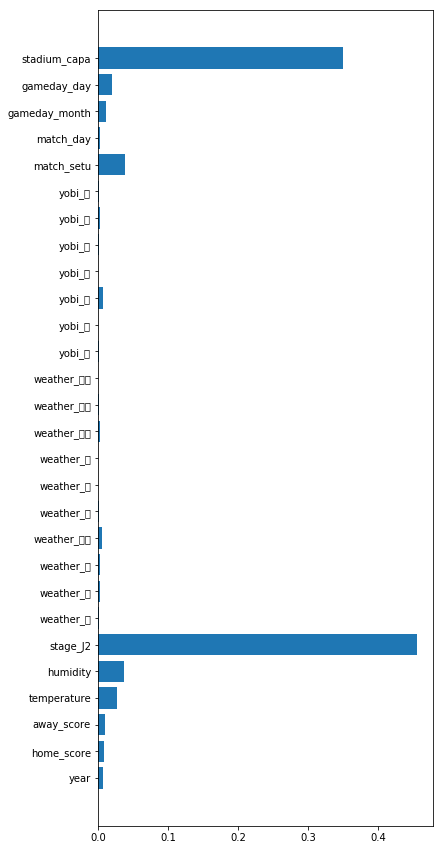

In [38]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(6, 15))
plt.barh(test_.columns, est.feature_importances_)